In [1]:
import networkx as nx
import pandas as pd
import csv
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import subprocess
import os

In [28]:
!pip install xlrd

In [3]:
df = pd.read_excel('../data/1-s2.0-S0896627321000805-mmc2.xlsx')

In [6]:
df.head(20)

,Supplemental Table 4. Regional length density,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,Structure hierarchy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,This study,NaN,NaN,NaN,NaN,NaN,Kirst 2020,NaN,Todorov 2020,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Vessel length density (m/mm^3),NaN,NaN,Capillary length density (m/mm^3),NaN,NaN,Vessel length density (m/mm^3),NaN,Vessel length density (m/mm^3),NaN
2,Level 1,Level 2,Level 3,Level 4,Level 5,Level 6,Level 7,Level 8,Level 9,Level 10,...,Mean,SE,SD,Mean,SD,SE,Mean,SD,Mean,SD
3,root,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.873209,0.0219056,0.243098,0.832922,0.020956,0.236707,-,-,-,-
4,root,grey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.896013,0.016842,0.223629,0.860002,0.0164124,0.219579,-,-,-,-
5,root,grey,CH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.830821,0.0144016,0.194057,0.800489,0.0169647,0.190904,-,-,-,-
6,root,grey,CH,CTX,NaN,NaN,NaN,NaN,NaN,NaN,...,0.844957,0.0147828,0.205468,0.815102,0.0176178,0.20134,-,-,-,-
7,root,grey,CH,CTX,CTXpl,NaN,NaN,NaN,NaN,NaN,...,0.858284,0.0152993,0.203733,0.828125,0.0181696,0.19962,-,-,-,-
8,root,grey,CH,CTX,CTXpl,Isocortex,NaN,NaN,NaN,NaN,...,0.911028,0.017162,0.160974,0.882747,0.01938,0.158097,-,-,-,-
9,root,grey,CH,CTX,CTXpl,Isocortex,FRP,NaN,NaN,NaN,...,0.895784,0.0527681,0.0435173,0.868534,0.0572489,0.0453738,-,-,0.611903,0.132036


In [30]:
## a code snippet to store the local path of the folder in which the current file is stored
# cmd = subprocess.Popen('pwd', stdout=subprocess.PIPE)
# cmd_out, cmd_err = cmd.communicate()
# local_path = os.fsdecode(cmd_out).strip()

#### Preliminary processing and exploration of the data

In [3]:
def path(year,attribute,annotated=False):
    if annotated:
        return f'../data/ML_{year}/ML{year}_annotated_vascular_graph_{attribute}.txt'
    else:
        return f'../data/ML_{year}/ML{year}_vascular_graph_{attribute}.txt'
    #return f'{local_path}/data/ML_{year}/ML{year}_annotated_vascular_graph_{attribute}.txt'

In [37]:
## Load the text files generated from data collected from .mat files
## Get the graph connections and other edge attributes

with open(path(2018,'vessel_mean_thicknesses',annotated=True),'r') as t:
    linest = t.readlines()
t.close()
with open(path(2018,'coordinates',annotated=True),'r') as f:
    lines = f.readlines()
f.close()
with open(path(2018,'connections',annotated=True),'r') as g:
    linesg = g.readlines()
g.close()
with open(path(2018,'vessel_lengths',annotated=True),'r') as l:
    linesl = l.readlines()
l.close()

## uncomment the following block if you're reading data from annotated vascular network
## on order to get the annotations of the nodes 
with open(path(2018,'region_labels',annotated=True),'r') as h:
    linesh = h.readlines()
h.close()

In [41]:
## To create and store the network vasculature data as a pandas dataframe 
def construct_df(year,annotated=False):
    if annotated:
        data = np.zeros((len(linesg),12))
        for k,line in enumerate(linesg):
            edge = line.strip().split(" ")
            data[k,0] = int(edge[0])
            data[k,1] = int(linesh[int(edge[0])-1].strip())
            data[k,2:5] = [int(x) for x in lines[int(edge[0])-1].strip().split(" ")]
            data[k,5] = int(edge[1])
            data[k,6] = int(linesh[int(edge[1])-1].strip())
            data[k,7:10] = [int(x) for x in lines[int(edge[1])-1].strip().split(" ")]
            data[k,10] = float(linesl[k].strip())
            data[k,11] = float(linest[k].strip())
        mouse_brain_vasc_network = pd.DataFrame(data,columns=['V1','RL1','VX1','VY1','VZ1','V2','RL2','VX2','VY2','VZ2','length','dt'])
        mouse_brain_vasc_network.to_pickle(f'../data/annotated_mouse_brain_vasc_network_{year}.pkl')
        print('Success!')
    else:
        data = np.zeros((len(linesg),10))
        for k,line in enumerate(linesg):
            nodes = line.strip().split(" ")
            coordinates = np.array([float(x) for x in lines[k].strip().split(" ")])
            data[k,0] = int(nodes[0])
            data[k,4] = int(nodes[1])
            data[k,1:4] = coordinates[:3]
            data[k,5:8] = coordinates[3:]
            data[k,8] = float(linest[k].strip())
            data[k,9] = float(linesl[k].strip())

        mouse_brain_vasc_coordinates = pd.DataFrame(data,columns=['V1','VX1','VY1','VZ1','V2','VX2','VY2','VZ2','dt','length'])
        mouse_brain_vasc_coordinates.to_pickle(f'../data/mouse_brain_vasc_network_{year}.pkl')
        print('Success!')
        
    return None

In [7]:
## Load the dataframe. Pick one that is needed for analysis -- two parameters that are needed:
## 1. annotated or not annotated
## 2. year, can choose one in {2018,2019,2020}

mouse_brain_vasc_network_2018 = pd.read_pickle('../data/annotated_mouse_brain_vasc_network_2018.pkl')
# mouse_brain_vasc_network_2019 = pd.read_pickle('../data/mouse_brain_vasc_network_2019.pkl')

In [8]:
## Take a peek at the initiall few entries
## V1,V2 - vertex labels
## RL1,RL2 - region labels
## (VX1,VY1,VZ1) - spatial coordinates of vertex V1
## (VX2,VY2,VZ2) - spatial coordinates of vertex V2
## length - vessel segment length
## dt - mean thickness of a vessel segment computed based on the thicknesses 
## of link voxels constituting that segment

mouse_brain_vasc_network_2018.head(5)

,V1,RL1,VX1,VY1,VZ1,V2,RL2,VX2,VY2,VZ2,length,dt
0,1.0,0.0,3188.0,4094.0,4.0,0.0,0.0,10341.0,6026.0,14006.0,35.59089,1.878005
1,1.0,0.0,3188.0,4094.0,4.0,0.0,0.0,10341.0,6026.0,14006.0,41.90349,1.878005
2,1.0,0.0,3188.0,4094.0,4.0,327.0,0.0,3188.0,4092.0,21.0,17.24277,11.729010
3,672.0,0.0,1679.0,3642.0,32.0,0.0,0.0,10341.0,6026.0,14006.0,61.24458,2.800138
4,217.0,0.0,1761.0,3692.0,17.0,0.0,0.0,10341.0,6026.0,14006.0,22.73550,2.995352


In [15]:
## note there are some null entries in the thickeness field

np.sum(mouse_brain_vasc_network_2018.isnull())

V1           0
RL1          0
VX1          0
VY1          0
VZ1          0
V2           0
RL2          0
VX2          0
VY2          0
VZ2          0
length       0
dt        1760
dtype: int64

In [60]:
## Summary statistics of length and thicknesses of the vessel segments
## One way to replace the null values in dt field is by using mean or median(50%)

mouse_brain_vasc_network_2018.describe()[['dt','length']]

,dt,length
count,6.569715e+06,6.571475e+06
mean,2.755613e+00,6.007250e+01
std,3.482071e+00,5.435405e+01
min,1.876420e+00,1.052100e+00
25%,1.972361e+00,2.081181e+01
50%,2.143279e+00,4.254131e+01
75%,2.610745e+00,8.531843e+01
max,1.723967e+02,2.424780e+03


In [10]:
summary_dt = mouse_brain_vasc_network_2018.dt.describe()

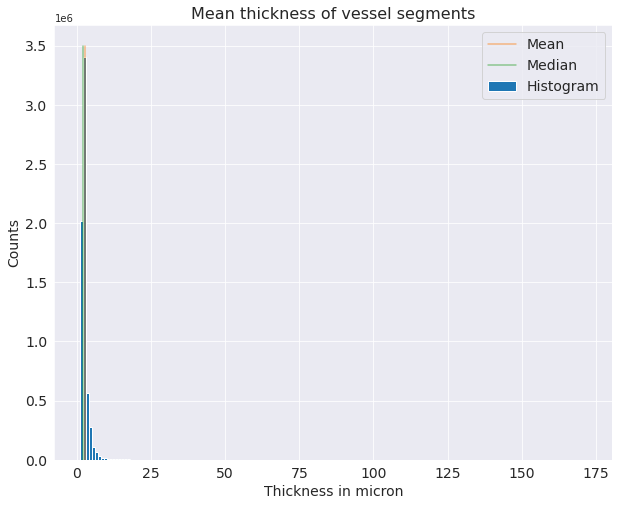

In [92]:
## Plot of distribution of mean thicknesses 
plt.figure(figsize=(10,8))
plt.title('Mean thickness of vessel segments',fontsize=16)
plt.xlabel('Thickness in micron',fontsize=14)
plt.ylabel('Counts',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.hist(mouse_brain_vasc_network_2018['dt'],\
         bins=range(round(min(mouse_brain_vasc_network_2018['dt']))-1,\
                    round(max(mouse_brain_vasc_network_2018['dt']))+1))
plt.plot([summary_dt['mean'],summary_dt['mean']],[0.0,3_500_000],alpha=0.5,c='k')
plt.plot([summary_dt['50%'],summary_dt['50%']],[0.0,3_500_000],alpha=0.5,c='r')
plt.legend(['Mean','Median','Histogram'],fontsize=14);

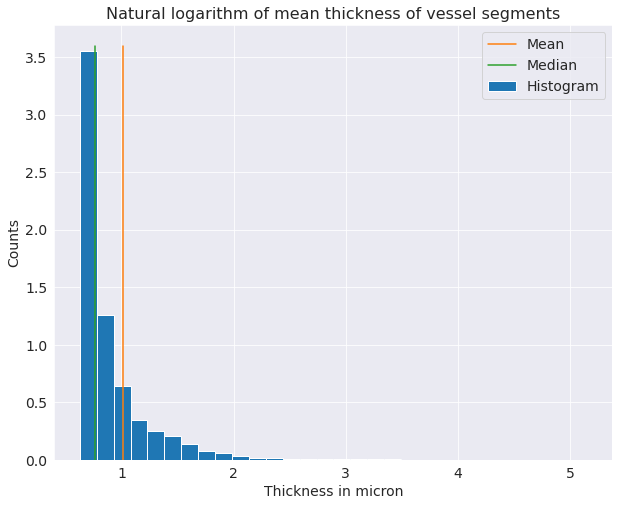

In [96]:
## Plot of distribution of the natural log mean thicknesses 
plt.figure(figsize=(10,8))
plt.title('Natural logarithm of mean thickness of vessel segments',fontsize=16)
plt.xlabel('Thickness in micron',fontsize=14)
plt.ylabel('Counts',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.hist(np.log(mouse_brain_vasc_network_2018['dt']),bins=30,density=True)
plt.plot([np.log(summary_dt['mean']),np.log(summary_dt['mean'])],[0.0,3.6],c='k')
plt.plot([np.log(summary_dt['50%']),np.log(summary_dt['50%'])],[0.0,3.6],c='r')
plt.legend(['Mean','Median','Histogram'],fontsize=14);

In [98]:
summary_length = mouse_brain_vasc_network_2018.length.describe()

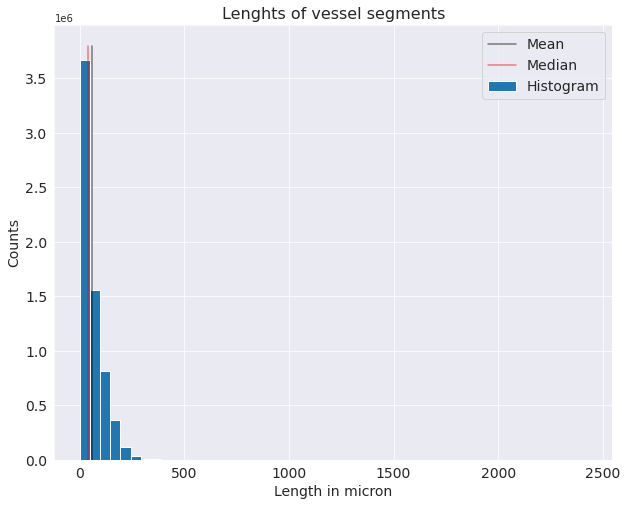

In [120]:
## Plot of distribution of lengths of the vessel segments
plt.figure(figsize=(10,8))
plt.title('Lenghts of vessel segments',fontsize=16)
plt.xlabel('Length in micron',fontsize=14)
plt.ylabel('Counts',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.hist(mouse_brain_vasc_network_2018['length'],bins=50)
plt.plot([summary_length['mean'],summary_length['mean']],[0.0,3_800_000],alpha=0.5,c='k')
plt.plot([summary_length['50%'],summary_length['50%']],[0.0,3_800_000],alpha=0.5,c='r')
plt.legend(['Mean','Median','Histogram'],fontsize=14);

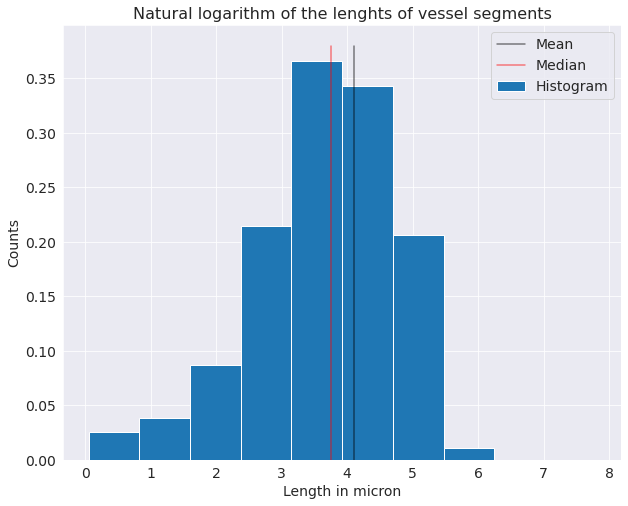

In [121]:
## Plot of distribution of the natural logarithm of lengths of the vessel segments
plt.figure(figsize=(10,8))
plt.title('Natural logarithm of the lenghts of vessel segments',fontsize=16)
plt.xlabel('Length in micron',fontsize=14)
plt.ylabel('Counts',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.hist(np.log(mouse_brain_vasc_network_2018['length']),density=True);
plt.plot([np.log(summary_length['mean']),np.log(summary_length['mean'])],[0.0,.38],alpha=0.5,c='k')
plt.plot([np.log(summary_length['50%']),np.log(summary_length['50%'])],[0.0,.38],alpha=0.5,c='r')
plt.legend(['Mean','Median','Histogram'],fontsize=14);

In [11]:
## Since the distribution is skewed, we replace the null/missing values with the median 
mouse_brain_vasc_network_2018['dt'] = mouse_brain_vasc_network_2018['dt'].fillna(summary_dt['50%'])

## notice that there are no more missing values
np.sum(mouse_brain_vasc_network_2018.isnull())

V1        0
RL1       0
VX1       0
VY1       0
VZ1       0
V2        0
RL2       0
VX2       0
VY2       0
VZ2       0
length    0
dt        0
dtype: int64

In [12]:
## Group by region labels to segregate the vasculature based on annotations

regional_groups = mouse_brain_vasc_network_2018.groupby(by=['RL1','RL2'])
rl1 = mouse_brain_vasc_network_2018.RL1.unique()
rl2 = mouse_brain_vasc_network_2018.RL2.unique()

for label1,label2 in list(zip(rl1,rl2))[2:3]:
    df = pd.DataFrame(regional_groups.get_group((label1,label2)))

## notice that the region labels are uniform across alll the rows of the dataframe    
df.head(5)

,V1,RL1,VX1,VY1,VZ1,V2,RL2,VX2,VY2,VZ2,length,dt
115,13.0,1107.0,2364.0,4046.0,7.0,1989.0,380.0,2330.0,4056.0,61.0,83.79675,2.163188
524,31.0,1107.0,2147.0,3863.0,11.0,761.0,380.0,2122.0,3932.0,34.0,96.45063,2.232250
956,109.0,1107.0,1935.0,3798.0,15.0,1186.0,380.0,1877.0,3894.0,45.0,199.02980,1.921623
960,81.0,1107.0,2043.0,3877.0,13.0,5418.0,380.0,2082.0,3912.0,134.0,155.18700,1.916363
1339,183.0,1107.0,1814.0,3790.0,16.0,2304.0,380.0,1825.0,3838.0,67.0,81.54148,1.914200


#### Segmenting regions in the vascular network based on annotations

In [13]:
# get hierarchical region label (Alan Atlas) data 

with open(path(2018,'structure_id_path_t',annotated=True),'r') as f:
    lines = f.readlines()
f.close()
with open(path(2018,'structure_id_path',annotated=True),'r') as t:
    linest = t.readlines()
t.close()

## Tree depthwise organization of region labels
hierarchical_tree_nodes = {}
for k,line in enumerate(lines):
    hierarchical_tree_nodes[k] = set([int(s) for s in line.strip().split(' ') if int(s)!=0])

## The list of region labels organized such that the column indices are depths and rows correspond to
## a path from root to a leaf
nodes = []
for line in linest:
    nodes.append([int(x) for x in line.strip().split(' ')])

In [14]:
## Collecting all the nodes that fall within a subtree in the hierarchical tree of region labels
## the array index of hierarchical_tree_nodes specifies the depth
depth = 2
subgraphs = {}
for node in hierarchical_tree_nodes[depth]:
    for node_list in nodes:
        if node_list[depth] == node:
            if node not in subgraphs:
                subgraphs[node] = [k for k in node_list[depth+1:] if k!=0]
            else:
                subgraphs[node].extend([k for k in node_list[depth+1:] if k!=0])

In [15]:
## Collect all the leaves that associated with a subtree with root given by key
node_to_leaves = {}
for k in rl1:
    for key,val in list(subgraphs.items()):
        if abs(int(k)) in val:
            if key not in node_to_leaves:
                node_to_leaves[key]=[k]
            else:
                node_to_leaves[key].append(k)

In [26]:
nodes_to_component_size[1015]

[((1026.0, -1026.0), 176), ((1051.0, 1051.0), 6471)]

In [21]:
## Calculate the size of the regions by grouping nodes into unique buckets with edges having identical
## region labels
sizes = {}
for label1,label2 in list(zip(rl1,rl2)):
    try:
        sizes[(label1,label2)] = regional_groups.get_group((label1,label2)).shape
    except KeyError as ke:
        pass

## Calculate the sizes of the components of the annotated vasculature associated with subtrees at the depth
## specified earlier     
nodes_to_component_size={}
for key,val in sizes.items():
    for item in node_to_leaves.keys():
        if (key[0] in node_to_leaves[item]) and (key[1] in node_to_leaves[item]):
            if item not in nodes_to_component_size:
                nodes_to_component_size[item] = [(key,val[0])]
            else:
                nodes_to_component_size[item].append((key,val[0]))

In [22]:
## The region labels at depth = depth of the hierarchical tree (ignoring the 0 label)

list(nodes_to_component_size.keys())

[3, 1103, 1294, 640, 1239, 1191, 1015, 1172]

In [27]:
## The sizes of the regions in terms of number of leaves

print(' '.join([str(sum([x[1] for x in nodes_to_component_size[key]])) for key in nodes_to_component_size.keys()]))

501878 23151 295


In [7]:
## Getting the spatial coordinates of the vasculature -- this is useful for exporting the coordinates to
## be used in other coomputations

coordinates = {}
for k in range(coordinates_v1.shape[0]):
    coordinates[coordinates_v1.iloc[k]['V1']] = (coordinates_v1.iloc[k]['VX1'],coordinates_v1.iloc[k]['VY1'],coordinates_v1.iloc[k]['VZ1'])
for k in range(coordinates_v2.shape[0]):
    if coordinates_v2.iloc[k]['V2'] in coordinates:
        pass
    else:
        coordinates[coordinates_v2.iloc[k]['V2']] = (coordinates_v2.iloc[k]['VX2'],coordinates_v2.iloc[k]['VY2'],coordinates_v2.iloc[k]['VZ2'])

In [8]:
## Saving the coordinates data 
# with open("coordinates_2018.csv","w+") as f:
#     writer = csv.writer(f)
#     for key,value in coordinates.items():
#         b = [key]
#         for num in value:
#             b.append(num)
#         writer.writerow(b)

In [51]:
## Importing the sampled networks and summarizing the characetristics of the graphs generated
## by the systematically sampled networks

# filenames=[]
# files = [os.fsdecode(file) for file in os.listdir('../data/box_graph_data_2018_500/')]
# for filename in files:
#     if filename.startswith('network_data_box_sampling_nooverlaps_'):
#         filenames.append(filename)
        
# graph_data=[]
# for file in files[1:]:
#     graph_data = []
#     with open("../data/box_graph_data_2018_500/" + file,encoding = 'utf-8') as csvfile:
#         filereader = csv.reader(csvfile)
#         for row in filereader:
#             graph_data.append([float(item) for item in row])
            
#     markers = []
#     for k in range(len(graph_data)):
#         if graph_data[k] == [0,0,0,0,0,0]:
#             markers.append(k)
        
#     markers.append(len(graph_data))
    
# summary_data = [(graph_data[k+1][0],\
#                  graph_data[k+1][1],\
#                  graph_data[k+1][2],\
#                  round(graph_data[k+1][4]*500**3),\
#                  round(graph_data[k+1][5]*500**3)) for k in markers[:-1]]

# graphs=[]
# summary_data = np.array(summary_data)
# for j,k in enumerate(markers[:-1]):
#     G = nx.Graph()
#     i = 0
#     for e in graph_data[markers[j]+1:markers[j+1]]:
#         G.add_edge(e[0],e[1])
#         i += 1
#     graphs.append(G)
#     summary_data[j,4] = i
# degree_list = [[item[1] for item in list(graphs[k].degree())] for k in range(len(graphs))]

In [50]:
## to check the consistency of the persistence homology computation related to normalizing 
## the distribution of thicknesses/resistances 

# directory1 = os.fsencode(local_path+'/normalized_weights_PH_2020/')
# for file1 in os.listdir(directory1):
#     filename1 = os.fsdecode(file1)
#     directory2 = os.fsencode(local_path+'/normalized_weights_PH_2020/'+filename1+'/PH_2020/')
#     number_of_networks = 0
#     k = 0
#     try:
#         for file2 in os.listdir(directory2):
#             filename2 = os.fsdecode(file2)
#             k += 1
#             if filename2.startswith('PH_640_'):
#                 try:
#                     number_of_networks += len(list(os.listdir(os.fsencode(local_path+'/normalized_weights_PH_2020/'+filename1+'/PH_2020/'+filename2))))
#                 except FileNotFoundError as fnfe:
#                     pass
#     except FileNotFoundError as fnfe:
#         pass
#     print(number_of_networks/2,k)